## discrete fourier transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [2]:
def dft(xn):
    N = len(xn)
    n = np.arange(N)
    k = np.arange(N).reshape(N,1)
    W_k_n_N = np.exp(-2j * np.pi * k * n / N)
    xn_f = np.dot(W_k_n_N, xn)
    return xn_f

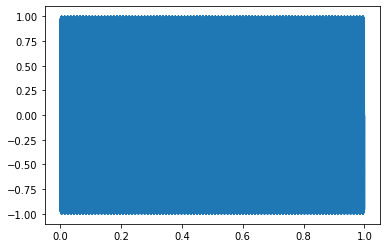

In [3]:
fs = 44100
frequency = 4400
time_axis = np.linspace(0, 1, fs, endpoint=True)
signal_array = np.sin((time_axis * 2 * np.pi) * frequency)

plt.plot(time_axis, signal_array)
plt.show()

In [4]:
fft_size = 512
signal_array_f = dft(signal_array[:fft_size])
magnitude = np.abs(signal_array_f) / fft_size
phase = np.angle(signal_array_f)

In [5]:
print("maximum peak / FFTN:", np.argmax(magnitude[:fft_size//2])/fft_size)
print("frequency / sample rate:", frequency/fs)

maximum peak / FFTN: 0.099609375
frequency / sample rate: 0.09977324263038549


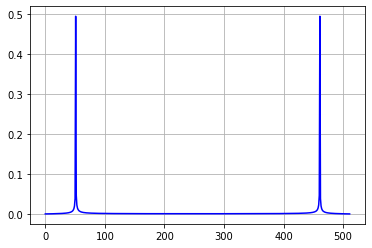

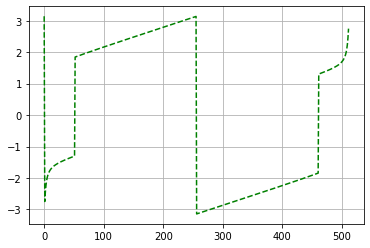

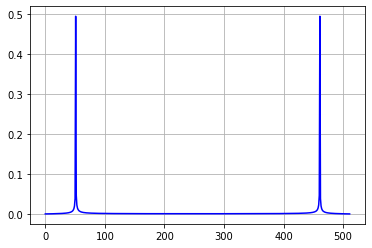

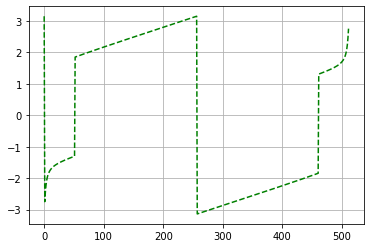

In [6]:
plt.figure(1)
plt.plot(magnitude,'b')
plt.grid()

plt.figure(2)
plt.plot(phase,'g--')
plt.grid()

plt.figure(3)
plt.plot(np.abs(np.fft.fft(signal_array[:fft_size])/fft_size), 'b')
plt.grid()

plt.figure(4)
plt.plot(np.angle(np.fft.fft(signal_array[:fft_size])/fft_size), 'g--')
plt.grid()

plt.show()

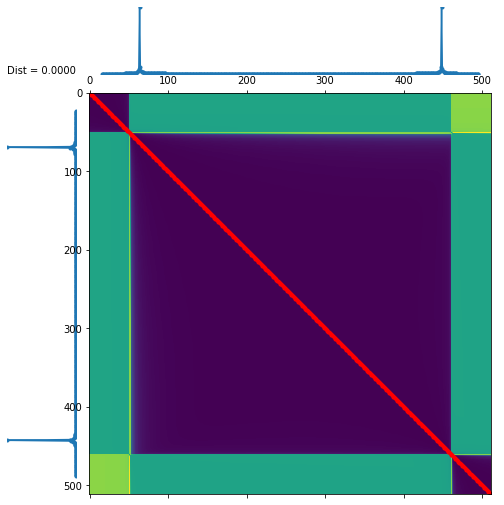

In [7]:
s1 = magnitude
s2 = np.abs(np.fft.fft(signal_array[:fft_size])/fft_size)
            
distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
fig, axes = dtwvis.plot_warpingpaths(s1, s2, paths, best_path)
fig.set_size_inches(7, 7)

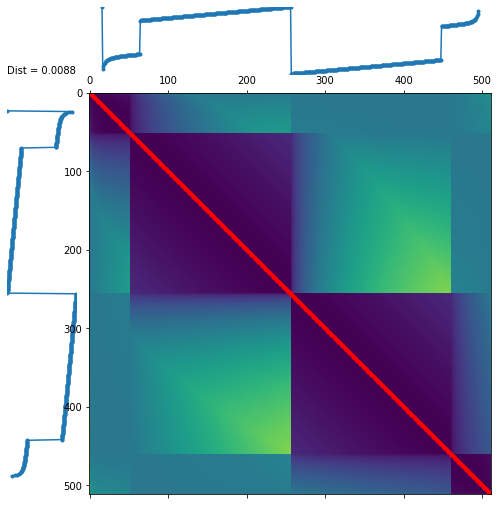

In [8]:
s1 = phase
s2 = np.angle(np.fft.fft(signal_array[:fft_size]))
            
distance, paths = dtw.warping_paths(s1, s2)
best_path = dtw.best_path(paths)
fig, axes = dtwvis.plot_warpingpaths(s1, s2, paths, best_path)
fig.set_size_inches(7, 7)

## short time fourier transform

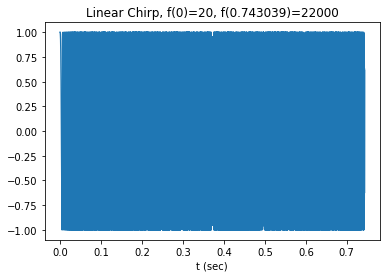

In [9]:
fs = 44100
sample = 32768
time = sample / fs
f0 = 20
f1 = 22000 
time_axis = np.linspace(0, time, sample)
signal_array = signal.chirp(t=time_axis, f0=f0, f1=f1, t1=time, method='linear')

plt.plot(time_axis, signal_array)
plt.title("Linear Chirp, f(0)=%d, f(%f)=%d" %(f0, time, f1))
plt.xlabel('t (sec)')
plt.show()

In [13]:
def stft(xn, stft_size, overlap, fs):
    # total size of data
    frame_size = len(xn)
    
    # overlaping area between two adjacent data 
    overlap = int(overlap * stft_size)
    
    # append length during iteration
    append = stft_size - overlap
    
    # calculate frame number by 
    # 1. total size of data
    # 2. overlap size
    # 3. stft size
    frames = int((frame_size - stft_size)/append) +1
    
    # init a window before dft process
    window = signal.windows.hann(stft_size)
    
    # output array to storage multiple dft result
    output = np.zeros((frames, stft_size),dtype=complex)
    
    time_axis = np.linspace(0, frame_size/fs, frames)
    freq_axis = np.linspace(0, fs, stft_size)
    
    start = 0
    for index in range(frames):
        end = (index+1) * stft_size - overlap*index
        xn_f = dft(xn[start:end]* window)
        output[index] = xn_f
        start = start + append
        
    return time_axis, freq_axis, output.T*2

In [ ]:
t, f, Wxx = stft(signal_array, 128, 0.75, fs)
plt.pcolormesh(t, f, np.abs(Wxx))
plt.show()

In [ ]:
f, t, Wxx = signal.stft(signal_array, fs)
plt.pcolormesh(t, f, np.abs(Wxx))
plt.show()